# Zadanie 2c w nowej wersji z nowymi danymi

Instalacja paczek:

In [ ]:
!pip install numpy
!pip install pandas

Potrzebne importy:

In [2]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt

Z wikipedii pobieram dane dotyczące demografii polski od roku 1946 do roku 2021

In [3]:
URL = "https://pl.wikipedia.org/wiki/Demografia_Polski"
resp = requests.get(URL) 
if resp.status_code == 200:    # czy stronę udało się otworzyć?
    soup = BeautifulSoup(resp.content,'html.parser')  # utowrzenie drzewa wyszukiwań
    tab = soup.find_all('table',{'class':"wikitable"})   # ekstrakcja tabel z drzewa wyszukiwań

for tag in soup.find_all(class_="reference"): # usuwanie wikipediowych referencji
    tag.decompose()

df = pd.read_html(str(tab[6]))[0]
df['Rok'] = df['Rok'].fillna(0).astype(int)
df.drop(df[df['Rok'] == 0].index, inplace=True)

df.set_index('Rok', inplace=True)
display(df)


,"Populacja(w tys.,stan na 31.12.)",Urodzeniażywe,Zgonyogółem,Przyrostnaturalny,Współczynnikurodzeń żywych(na 1000),Współczynnikzgonów(na 1000),Przyrostnaturalny(na 1000),Dzietność,Imigracja,Emigracja,SaldoMigracji
Rok,,,,,,,,,,,
1946,23 640,622 500,241 800,380 700,262.0,102.0,160,NaN,NaN,NaN,NaN
1947,23 754,681 200,258 400,422 800,287.0,109.0,178,NaN,NaN,NaN,NaN
1948,24 211,704 800,267 300,437 500,294.0,112.0,182,NaN,NaN,NaN,NaN
1949,24 613,725 100,280 500,444 600,297.0,115.0,182,NaN,NaN,NaN,NaN
1950,25 035,763 100,288 700,474 400,307.0,116.0,191,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2017,38 434,402 000,402 852,−852,105.0,105.0,00,1450.0,13 324,11 888,1 434
2018,38 411,388 200,414 200,−25 789,101.0,108.0,"−0,7",1435.0,15 461,11 849,3 612
2019,38 383,374 800,409 709,−34 909,98.0,107.0,"−0,9",1419.0,16 900,10 700,6 200


Warto przyjrzeć się jak wyglądał przyrost naturalny w kolejnych latach

In [4]:
# formatowanie kolumny

df['Przyrostnaturalny'] = df['Przyrostnaturalny'].str.replace(" ", "") # usuń spacje z liczb
df['Przyrostnaturalny'] = df['Przyrostnaturalny'].str.replace("−", "-") # zastąp jeden rodzaj myślnika minusem
df['Przyrostnaturalny'] = df['Przyrostnaturalny'].str.replace("–", "-") # zastąp drugi rodzaj myślnika minusem
df['Przyrostnaturalny'] = df['Przyrostnaturalny'].astype(int)

In [5]:
display(df['Przyrostnaturalny'])

Rok
1946    380700
1947    422800
1948    437500
1949    444600
1950    474400
         ...  
2017      -852
2018    -25789
2019    -34909
2020   -122635
2021   -184000
Name: Przyrostnaturalny, Length: 76, dtype: int64

Na przyrost naturalny warto patrzeć z perspektywy dziesięcioleci. Można przyjąć (patrząc na kulturę amerykańską, gdzie było to najbardziej widoczne), że co około 10 lat zmieniają się poglądy ludzi i styl życia. 

In [6]:
df.insert(1, 'M_Przyrost', df['Przyrostnaturalny'].rolling(10).mean())

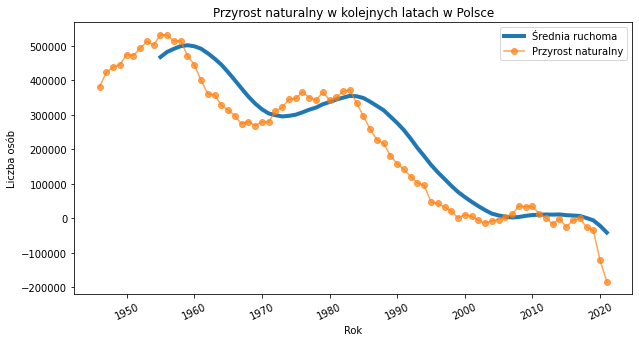

In [7]:
df['M_Przyrost'].plot(rot=25, figsize=(10,5), linewidth=4)
df['Przyrostnaturalny'].plot(rot=25, figsize=(10,5), marker='o', alpha=0.7)

plt.title("Przyrost naturalny w kolejnych latach w Polsce")
plt.ylabel("Liczba osób")
plt.legend(['Średnia ruchoma', 'Przyrost naturalny'])

plt.show()

# Zadanie 3d

Spójrzmy na dane dotyczące bezrobocia w polsce w latach 2003-2019.
Sprawdzę, czy istnieje zależność liniowa, bądź kwadratowa pomiędzy średnim bezrobociem w danym roku a przrostem naturalnym.

Dane w tabeli to stopa bezrobocia w danym miesiącu. Stopa bezrobocia to stosunek liczby bezrobotnych zarejestrowanych do liczby ludności aktywnej zawodowo (tj. pracującej i bezrobotnej łącznie) wyrażony w procentach.

In [8]:
bezrobocie = pd.read_html(str(tab[7]))[0]
bezrobocie.set_index('Rok', inplace=True)
bezrobocie = bezrobocie.astype(float)
bezrobocie = bezrobocie / 10

bezrobocie.drop([2020, 2021], axis=0, inplace=True)

display(bezrobocie)

,Styczeń,Luty,Marzec,Kwiecień,Maj,Czerwiec,Lipiec,Sierpień,Wrzesień,Październik,Listopad,Grudzień
Rok,,,,,,,,,,,,
2019,6.1,6.1,5.9,5.6,5.4,5.3,5.2,5.2,5.1,5.0,5.1,5.2
2018,6.8,6.8,6.6,6.3,6.1,5.8,5.8,5.8,5.7,5.7,5.7,5.8
2017,8.5,8.4,8.0,7.6,7.3,7.0,7.0,7.0,6.8,6.6,6.5,6.6
2016,10.2,10.2,9.9,9.4,9.1,8.7,8.5,8.4,8.3,8.2,8.2,8.2
2015,11.9,11.9,11.5,11.1,10.7,10.2,10.0,9.9,9.7,9.6,9.6,9.7
2014,13.9,13.9,13.5,13.0,12.5,12.0,11.8,11.7,11.5,11.3,11.4,11.4
2013,14.2,14.4,14.3,14.0,13.6,13.2,13.1,13.0,13.0,13.0,13.2,13.4
2012,13.2,13.4,13.3,12.9,12.6,12.3,12.3,12.4,12.4,12.5,12.9,13.4
2011,13.1,13.4,13.3,12.8,12.4,11.9,11.8,11.8,11.8,11.8,12.1,12.5


Przyrost naturalny jest liczbą rejestrowaną raz na rok, zatem porównam przyrost naturalny do średniej rocznej stopy bezrobocia

In [9]:
bezrobocie['Średnia'] = bezrobocie.mean(axis=1)
bezrobocie_srednia = bezrobocie['Średnia'].to_frame()

bezrobocie_srednia.insert(1, 'Przyrostnaturalny', df['Przyrostnaturalny'])
bezrobocie_srednia = bezrobocie_srednia.round(2)

display(bezrobocie_srednia)

,Średnia,Przyrostnaturalny
Rok,,
2019,5.43,-34909
2018,6.07,-25789
2017,7.27,-852
2016,8.94,-5752
2015,10.48,-25613
2014,12.32,-1340
2013,13.53,-17724
2012,12.80,1457
2011,12.39,12916


Używając gotowych metod z biblioteki sklearn wyznaczam modele i ocenieniam ich jakość za pomocą błędu średniokwadratowego

In [10]:
X = bezrobocie_srednia['Średnia'].values
Y = bezrobocie_srednia['Przyrostnaturalny'].values

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Parametry modelu liniowego: [1415.32845], -18910.21201
Błąd średniokwadratowy modelu liniowego: 3.82e+08

Parametry modelu GLM: [    0.     16244.1777  -599.7449], -100637.17679
Błąd średniokwadratowy modelu GLM: 2.05e+08



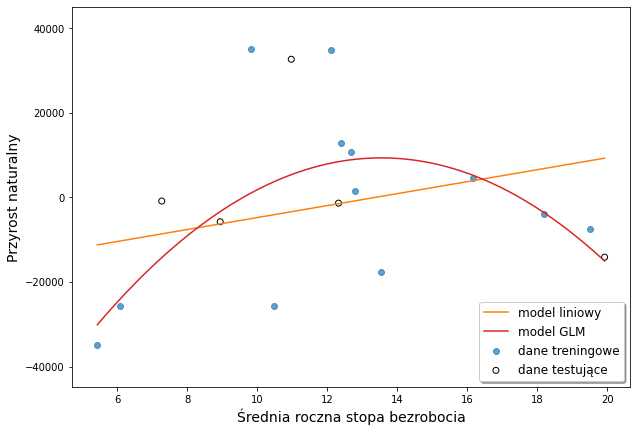

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)


# =========  Model liniowy =========
from sklearn.linear_model import LinearRegression
model_lin = LinearRegression()
model_lin.fit(X_train.reshape(-1,1), 
              Y_train)
print(f'Parametry modelu liniowego: {np.round(model_lin.coef_,5)}, {np.round(model_lin.intercept_,5)}')
MSE_lin = mean_squared_error(Y_test, model_lin.predict(X_test.reshape(-1,1)))
print(f'Błąd średniokwadratowy modelu liniowego: {MSE_lin:0.3}\n')

# ===== Uogólniony model liniowy (ang. Generalized Linear Model) =====
from sklearn.preprocessing import PolynomialFeatures
model_GLM = LinearRegression()
gen_features = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
model_GLM.fit(gen_features.fit_transform(X_train.reshape(-1,1)), 
              Y_train)
print(f'Parametry modelu GLM: {np.round(model_GLM.coef_,4)}, {np.round(model_GLM.intercept_,5)}')
MSE_GLM = mean_squared_error(Y_test, model_GLM.predict(gen_features.fit_transform(X_test.reshape(-1,1))))
print(f'Błąd średniokwadratowy modelu GLM: {MSE_GLM:0.3}\n')

# Predykcje wszystkich modeli dla całego zakreso osi X
os_x = np.linspace(start=X.min(), stop=X.max(), num=300)
y_lin_pred = model_lin.predict(os_x.reshape(-1,1))
y_GLM_pred = model_GLM.predict(gen_features.fit_transform(os_x.reshape(-1,1)))

# Wizualizacja
plt.figure(figsize=(10,7))
plt.scatter(X_train, Y_train, label='dane treningowe', alpha=0.7)
plt.scatter(X_test, Y_test, edgecolor='black', facecolor='none', label='dane testujące')
plt.plot(os_x, y_lin_pred, label='model liniowy', color='tab:orange')
plt.plot(os_x, y_GLM_pred, label=f'model GLM', color='tab:red')
plt.xlabel('Średnia roczna stopa bezrobocia', fontsize=14)
plt.ylabel('Przyrost naturalny', fontsize=14)
plt.legend(fontsize=12, shadow=True, loc='lower right')
plt.ylim([Y.min()-10000, Y.max()+10000])
plt.show()

Widać że model kwadratowy okazał się być mniejszy niż błąd liniowy. Z rozrzucenia danych można wywnioskować, że dane nie są skolerowane
